In [ ]:
from google.colab import drive
import os
#drive connection
drive.mount('/content/drive')
os.getcwd()
os.chdir('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
CATEGORIES=["Bacterial_leaf_blight","Brown spot","Leaf smut"]
#Making label of data
data=[]
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join("/content/drive/MyDrive/rice_leaf_diseases",category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))            
            data.append([img,label])
print(len(data))

120


In [ ]:
import random

random.shuffle(data)

for lbl in data[:10]:
    print(lbl[1])

2
0
0
2
0
2
0
0
2
1


In [ ]:
#spilting features and label in Training data
X=[]
y=[]

for features,label in data:
    X.append(features)
    y.append(label)
Y=[]
for i in y:
    if i==0:
        Y.append("Bacterial_leaf_blight")
    elif i==1:
        Y.append("Brown spot")
    else:
        Y.append("Leaf smut")
print(len(X),len(y))

120 120


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


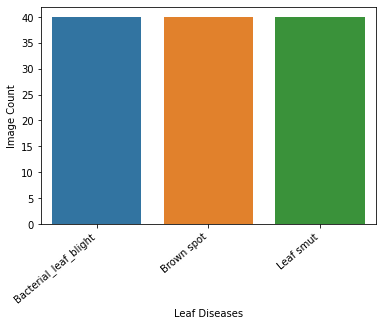

In [ ]:
ax=sns.countplot(Y, order=CATEGORIES)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(len(X_train),len(X_test),len(y_train),len(y_test))

90 30 90 30


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
from tensorflow.keras.utils import to_categorical

one_hot_train=to_categorical(y_train)
print(one_hot_train)

one_hot_test=to_categorical(y_test)
print(one_hot_test)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf
num_classes = 3
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64,activation='relu'),
  
  layers.Dense(3,activation='softmax')
  #layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
"""

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
"""
              
hist=model.fit(X_train,y_train, epochs=40,batch_size=128,validation_split=0.2)



Epoch 1/40


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 1.0992 - accuracy: 0.3472 - val_loss: 1.1072 - val_accuracy: 0.4444
Epoch 2/40
1/1 [==============================] - 0s 318ms/step - loss: 1.1144 - accuracy: 0.3472 - val_loss: 1.0886 - val_accuracy: 0.4444
Epoch 3/40
1/1 [==============================] - 0s 329ms/step - loss: 1.0779 - accuracy: 0.5417 - val_loss: 1.0891 - val_accuracy: 0.3333
Epoch 4/40
1/1 [==============================] - 0s 309ms/step - loss: 1.0732 - accuracy: 0.3611 - val_loss: 1.0706 - val_accuracy: 0.3333
Epoch 5/40
1/1 [==============================] - 0s 309ms/step - loss: 1.0568 - accuracy: 0.4722 - val_loss: 1.0568 - val_accuracy: 0.6111
Epoch 6/40
1/1 [==============================] - 0s 315ms/step - loss: 1.0354 - accuracy: 0.6250 - val_loss: 1.0529 - val_accuracy: 0.5556
Epoch 7/40
1/1 [==============================] - 0s 339ms/step - loss: 1.0121 - accuracy: 0.6250 - val_loss: 1.0413 - val_accuracy: 0.4444
Epoch 8/40
1/1 [==================

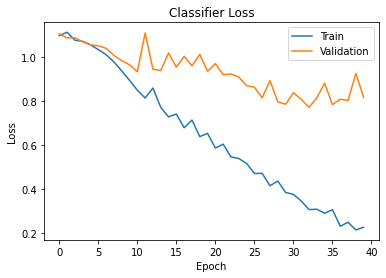

'\nThe training loss indicates how well the model is fitting the training data, while the validation loss indicates how well the model fits new data\n'

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Classifier Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()
"""
The training loss indicates how well the model is fitting the training data, while the validation loss indicates how well the model fits new data
"""

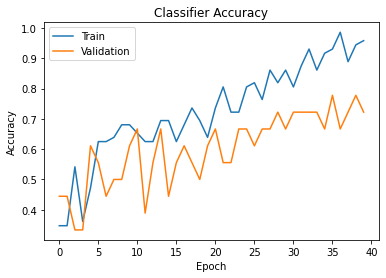

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 56ms/step - loss: 1.0952 - accuracy: 0.5000


[1.0951588153839111, 0.5]

In [ ]:
predictions = model.predict(X_test)
predictions

array([[5.70667982e-01, 3.68305504e-01, 6.10265732e-02],
       [9.61178727e-03, 8.72023582e-01, 1.18364528e-01],
       [7.33509511e-02, 7.48686612e-01, 1.77962422e-01],
       [5.90869226e-02, 6.32409632e-01, 3.08503509e-01],
       [8.80478621e-01, 6.18295893e-02, 5.76917045e-02],
       [4.42106724e-02, 5.38013339e-01, 4.17775989e-01],
       [8.26424837e-01, 8.67486075e-02, 8.68265331e-02],
       [4.14850205e-01, 5.03109157e-01, 8.20405260e-02],
       [1.50988877e-01, 8.33225191e-01, 1.57859605e-02],
       [2.77747333e-01, 5.84640384e-01, 1.37612268e-01],
       [2.05047578e-02, 9.51994717e-01, 2.75005754e-02],
       [8.26638266e-02, 8.36378694e-01, 8.09574276e-02],
       [2.83612698e-01, 5.94689429e-01, 1.21697858e-01],
       [4.63482970e-03, 8.85564148e-01, 1.09801061e-01],
       [1.29833473e-02, 9.57287371e-01, 2.97292434e-02],
       [7.01157391e-01, 1.84861824e-01, 1.13980845e-01],
       [1.23313395e-03, 9.24901292e-02, 9.06276703e-01],
       [1.06334882e-02, 4.69371

In [ ]:
import keras
data_augmentation = keras.Sequential(
  [

    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomFlip("horizontal")
  ]
)

In [ ]:
num_classes = 3

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train, y_train, epochs=75,batch_size=5,validation_split=0.2)    

Epoch 1/75
15/15 [==============================] - 2s 67ms/step - loss: 1.1949 - accuracy: 0.3056 - val_loss: 1.1074 - val_accuracy: 0.2222
Epoch 2/75
15/15 [==============================] - 1s 57ms/step - loss: 1.1047 - accuracy: 0.3472 - val_loss: 1.0722 - val_accuracy: 0.6111
Epoch 3/75
15/15 [==============================] - 1s 38ms/step - loss: 1.0830 - accuracy: 0.3750 - val_loss: 1.0597 - val_accuracy: 0.5556
Epoch 4/75
15/15 [==============================] - 1s 37ms/step - loss: 1.0612 - accuracy: 0.5139 - val_loss: 1.0123 - val_accuracy: 0.4444
Epoch 5/75
15/15 [==============================] - 1s 36ms/step - loss: 0.9918 - accuracy: 0.5278 - val_loss: 1.0042 - val_accuracy: 0.4444
Epoch 6/75
15/15 [==============================] - 1s 35ms/step - loss: 0.9679 - accuracy: 0.5556 - val_loss: 1.1610 - val_accuracy: 0.3333
Epoch 7/75
15/15 [==============================] - 1s 35ms/step - loss: 0.8691 - accuracy: 0.5278 - val_loss: 1.0452 - val_accuracy: 0.3333
Epoch 8/75
15

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Classifier Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()